In [22]:
from collections import defaultdict

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)

In [23]:
def sort_by_mean(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    means = df2.mean().sort_values(ascending=False)
    return means

In [24]:
output_directory_path = '/Users/mariaa/Documents/output/wildchat/new'

<br><br><br><br>

## **Check accuracy of predictions**

### TASKS

In [17]:
tasks_annotated_df = pd.read_csv(output_directory_path + '/user-task-prediction/tasks.sample_to_annotate.ANNOTATED.csv')
len(tasks_annotated_df)

420

In [19]:
task_accuracy_dict = {}
for _task in tasks_annotated_df['predicted_category'].unique():
  _df = tasks_annotated_df[tasks_annotated_df['predicted_category'] == _task]
  _df = _df[_df['accuracy'] == 1.0]
  print(len(_df), '\t', _task)
  task_accuracy_dict[_task] = len(_df) / float(20)

18 	 answering multiple choice question
17 	 back-and-forth role-playing with the user
19 	 brainstorming and generating ideas
17 	 code editing and debugging
19 	 code generation
19 	 comparison, ranking, and recommendation
18 	 editing existing text
17 	 explanation, how-to, practical advice
9 	 general chitchat
13 	 generating character descriptions
16 	 generating communications (email, text messages, etc.)
19 	 generating non-fictional documents (resumes, essays, etc.)
6 	 generating prompts for ai models
19 	 information retrieval
19 	 model jailbreaking
18 	 personal advice about mental health, relationships, etc.
19 	 solving logic, math, and word problems
19 	 song and poem generation
15 	 story and script generation
16 	 summarization
17 	 translation


In [20]:
for _task, _accuracy in sorted(task_accuracy_dict.items(), key=lambda x: x[1], reverse=True):
  print(round(_accuracy, 2), '\t', _task)

0.95 	 brainstorming and generating ideas
0.95 	 code generation
0.95 	 comparison, ranking, and recommendation
0.95 	 generating non-fictional documents (resumes, essays, etc.)
0.95 	 information retrieval
0.95 	 model jailbreaking
0.95 	 solving logic, math, and word problems
0.95 	 song and poem generation
0.9 	 answering multiple choice question
0.9 	 editing existing text
0.9 	 personal advice about mental health, relationships, etc.
0.85 	 back-and-forth role-playing with the user
0.85 	 code editing and debugging
0.85 	 explanation, how-to, practical advice
0.85 	 translation
0.8 	 generating communications (email, text messages, etc.)
0.8 	 summarization
0.75 	 story and script generation
0.65 	 generating character descriptions
0.45 	 general chitchat
0.3 	 generating prompts for ai models


In [21]:
accuracies = [a for t, a in task_accuracy_dict.items() if a > 0.7]
np.mean(accuracies)

0.8916666666666667

### SENSITIVE CATEGORIES

In [61]:
sensitive_annotated_df = pd.read_csv(output_directory_path + '/sensitive-category-prediction/sensitive_categories.sample_to_annotate.ANNOTATED.csv')
len(sensitive_annotated_df)

240

In [63]:
sensitive_accuracy_dict = {}
for _sensitive in sensitive_annotated_df['predicted_category'].unique():
  _df = sensitive_annotated_df[sensitive_annotated_df['predicted_category'] == _sensitive]
  _df = _df[_df['accuracy'] == 1.0]
  print(len(_df), '\t', _sensitive)
  sensitive_accuracy_dict[_sensitive] = len(_df) / float(20)

20 	 academic and education info
14 	 fandom
20 	 financial and corporate info
18 	 healthcare information
16 	 job, visa, and other applications
19 	 quoted code
9 	 quoted emails and messages
20 	 sexual and erotic content
17 	 user's emotions and mental health
15 	 user's hobbies and habits
15 	 user's personal relationships
18 	 user's politics and religion


In [64]:
for _sensitive, _accuracy in sorted(sensitive_accuracy_dict.items(), key=lambda x: x[1], reverse=True):
  print(round(_accuracy, 2), '\t', _sensitive)

1.0 	 academic and education info
1.0 	 financial and corporate info
1.0 	 sexual and erotic content
0.95 	 quoted code
0.9 	 healthcare information
0.9 	 user's politics and religion
0.85 	 user's emotions and mental health
0.8 	 job, visa, and other applications
0.75 	 user's hobbies and habits
0.75 	 user's personal relationships
0.7 	 fandom
0.45 	 quoted emails and messages


In [65]:
accuracies = []
for _sensitive, _accuracy in sorted(sensitive_accuracy_dict.items(), key=lambda x: x[1], reverse=True):
    if _accuracy > 0.68:
        accuracies.append(_accuracy)
np.mean(accuracies)

0.8727272727272727

<br><br><br><br>

## **PLOTS**

In [66]:
def sort_by_mean(df, by, column, rot=0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    means = df2.mean().sort_values(ascending=False)
    return means

### Tasks histogram

/var/folders/5s/k0b92m_n5kzfzfwfmmkkx1040000gp/T/ipykernel_5458/836526240.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})


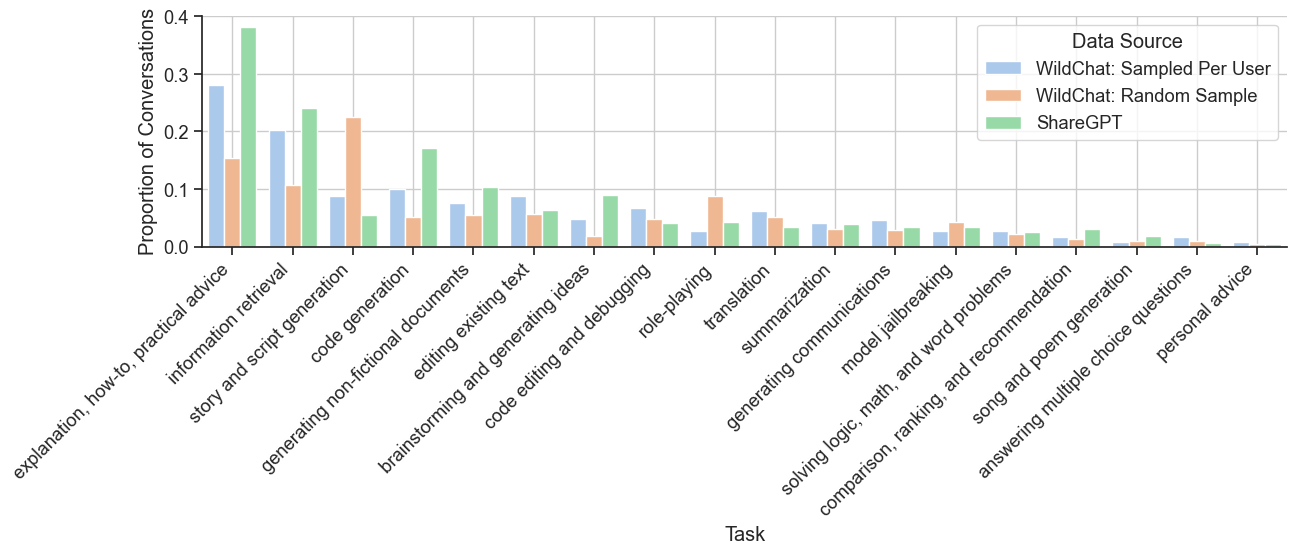

In [108]:
dicts_to_plot = []

task_count_dict = defaultdict(int)
for i, r in tasks_df.iterrows():
    task_count_dict[r['predicted_category_FIXED']] += 1
task_percent_dict = {t: c/5000.0 for t, c in task_count_dict.items()}

for _task, _percent in task_percent_dict.items():
    dicts_to_plot.append({'Task': _task,
                          'Proportion of Conversations': _percent,
                          'Data Source': 'WildChat: Sampled Per User'})
    
task_count_dict = defaultdict(int)
for i, r in tasks_not_controlled_df.iterrows():
    task_count_dict[r['predicted_category_FIXED']] += 1
task_percent_dict = {t: c/1000.0 for t, c in task_count_dict.items()}

for _task, _percent in task_percent_dict.items():
    dicts_to_plot.append({'Task': _task,
                          'Proportion of Conversations': _percent,
                          'Data Source': 'WildChat: Random Sample'})

task_count_dict = defaultdict(int)
for i, r in tasks_sharegpt_df.iterrows():
    task_count_dict[r['predicted_category_FIXED']] += 1
task_percent_dict = {t: c/1000.0 for t, c in task_count_dict.items()}

for _task, _percent in task_percent_dict.items():
    dicts_to_plot.append({'Task': _task,
                          'Proportion of Conversations': _percent,
                          'Data Source': 'ShareGPT'})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

plt.figure(figsize=(14,3))
sns.set(style='ticks', font_scale=1.2)
sns.barplot(data=df_to_plot,
            x='Task',
            y='Proportion of Conversations',
            hue='Data Source',
            palette='pastel',
            errwidth=0.8,
            capsize=0.4,
            order=sort_by_mean(df_to_plot, 
                               by=['Task'], 
                               column='Proportion of Conversations').index.values)
plt.grid()
sns.despine()
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/barplot.tasks_x_proportions.random_vs_per_user.pdf', bbox_inches='tight')

### Sensitive categories histogram

In [99]:
sensitive_shortened_dict = {'academic and education info': 'academic and education',
                            'quoted code': 'quoted code',
                            'fandom': 'fandom',
                            'user\'s hobbies and habits': 'hobbies and habits',
                            'financial and corporate info': 'financial and corporate',
                            'sexual and erotic content': 'sexual and erotic',
                            'job, visa, and other applications': 'job, visa, and other applications',
                            'healthcare information': 'healthcare',
                            'user\'s personal relationships': 'personal relationships',
                            'user\'s emotions and mental health': 'emotions and mental health',
                            'user\'s politics and religion': 'politics and religion'}

/var/folders/5s/k0b92m_n5kzfzfwfmmkkx1040000gp/T/ipykernel_82088/836526240.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})


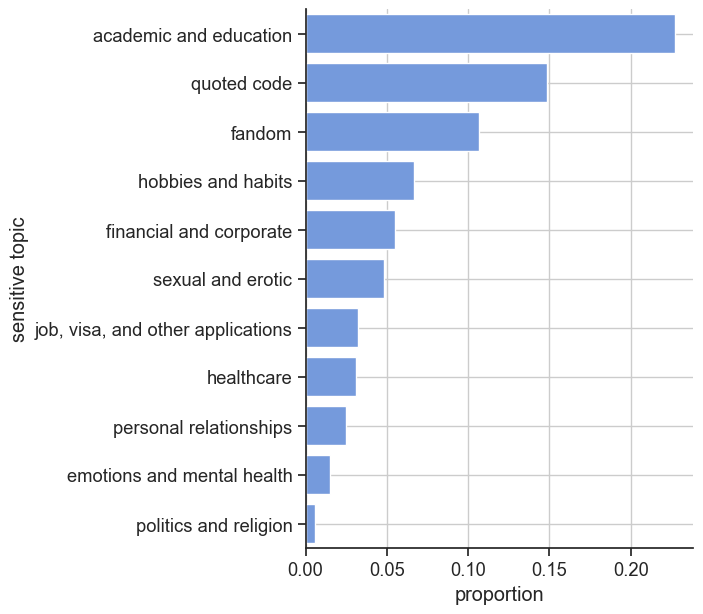

In [100]:
dicts_to_plot = []

task_count_dict = defaultdict(int)
for i, r in sensitive_df.iterrows():
    task_count_dict[r['predicted_category']] += 1
task_percent_dict = {t: c/5000.0 for t, c in task_count_dict.items()}

for _task, _percent in task_percent_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'proportion': _percent})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

plt.figure(figsize=(5,7))
sns.set(style='ticks', font_scale=1.2)
sns.barplot(data=df_to_plot,
            y='sensitive topic',
            x='proportion',
            color='cornflowerblue',
            errwidth=0.8,
            capsize=0.4,
            order=sort_by_mean(df_to_plot, 
                               by=['sensitive topic'], 
                               column='proportion').index.values)
plt.grid()
sns.despine()
# plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/barplot.sensitive_x_proportions.pdf', bbox_inches='tight')

/var/folders/5s/k0b92m_n5kzfzfwfmmkkx1040000gp/T/ipykernel_82088/836526240.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})


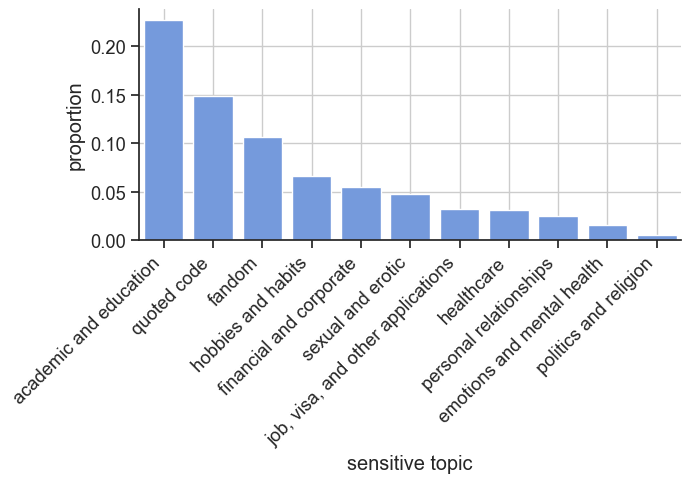

In [101]:
dicts_to_plot = []

task_count_dict = defaultdict(int)
for i, r in sensitive_df.iterrows():
    task_count_dict[r['predicted_category']] += 1
task_percent_dict = {t: c/5000.0 for t, c in task_count_dict.items()}

for _task, _percent in task_percent_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'proportion': _percent})
    
df_to_plot = pd.DataFrame(dicts_to_plot)

plt.figure(figsize=(7,3))
sns.set(style='ticks', font_scale=1.2)
sns.barplot(data=df_to_plot,
            x='sensitive topic',
            y='proportion',
            color='cornflowerblue',
            errwidth=0.8,
            capsize=0.4,
            order=sort_by_mean(df_to_plot, 
                               by=['sensitive topic'], 
                               column='proportion').index.values)
plt.grid()
sns.despine()
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/barplot.sensitive_x_proportions.h.pdf', bbox_inches='tight')

### Heatmap tasks x sensitive

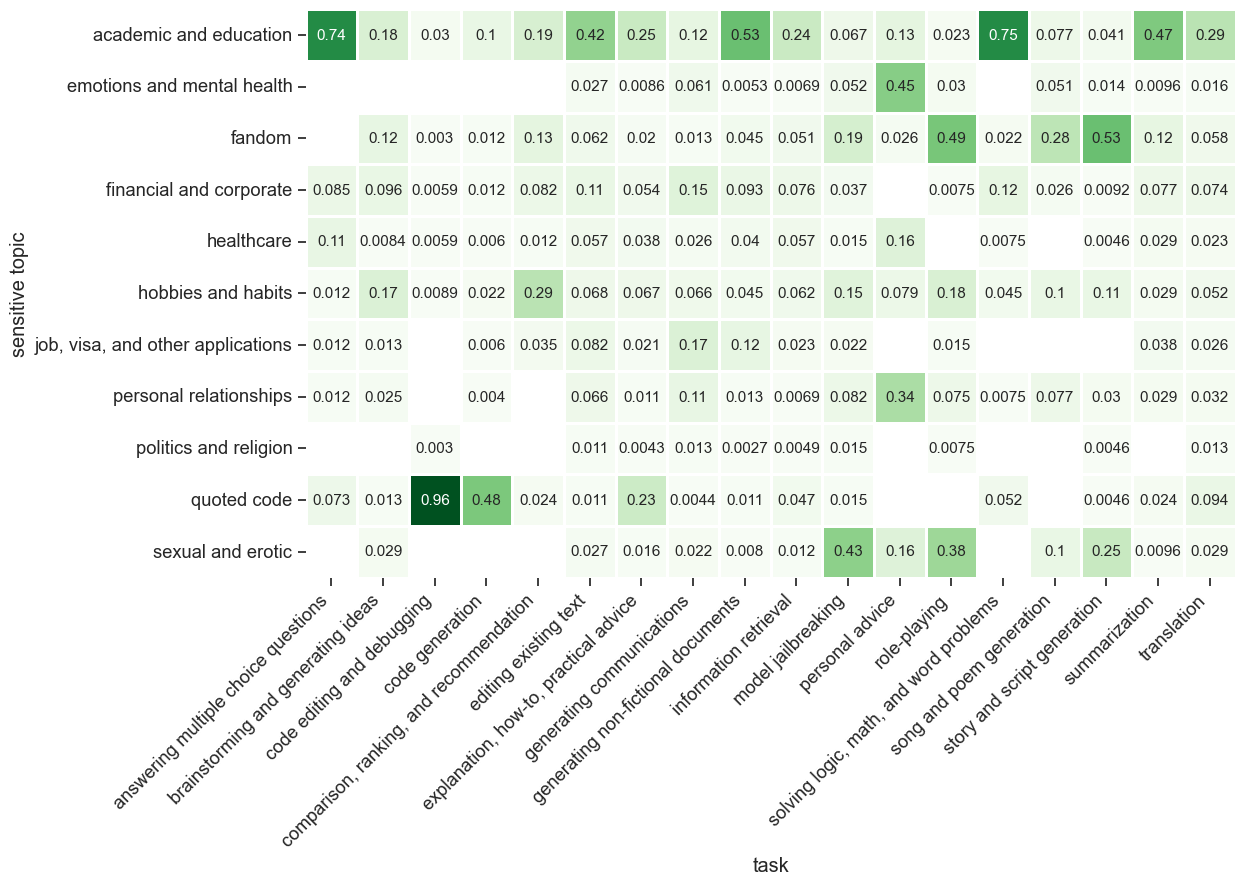

In [102]:
task_sensitive_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_tasks_dict.items():
    _sensitive_topics = conversation_sensitives_dict[_conversation]
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _topic in _sensitive_topics:
            task_sensitive_count_dict[_task][_topic] += 1

task_sensitive_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _sensitive_count_dict in task_sensitive_count_dict.items():
    for _topic, _count in _sensitive_count_dict.items():
        task_sensitive_proportion_dict[_task][_topic] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _sensitive_proportion_dict in task_sensitive_proportion_dict.items():
    for _topic, _proportion in _sensitive_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'sensitive topic': sensitive_shortened_dict[_topic],
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='sensitive topic', 
                                 columns='task', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,8))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_sensitive.pdf', bbox_inches='tight')
plt.show()

### Heatmap tasks x NER

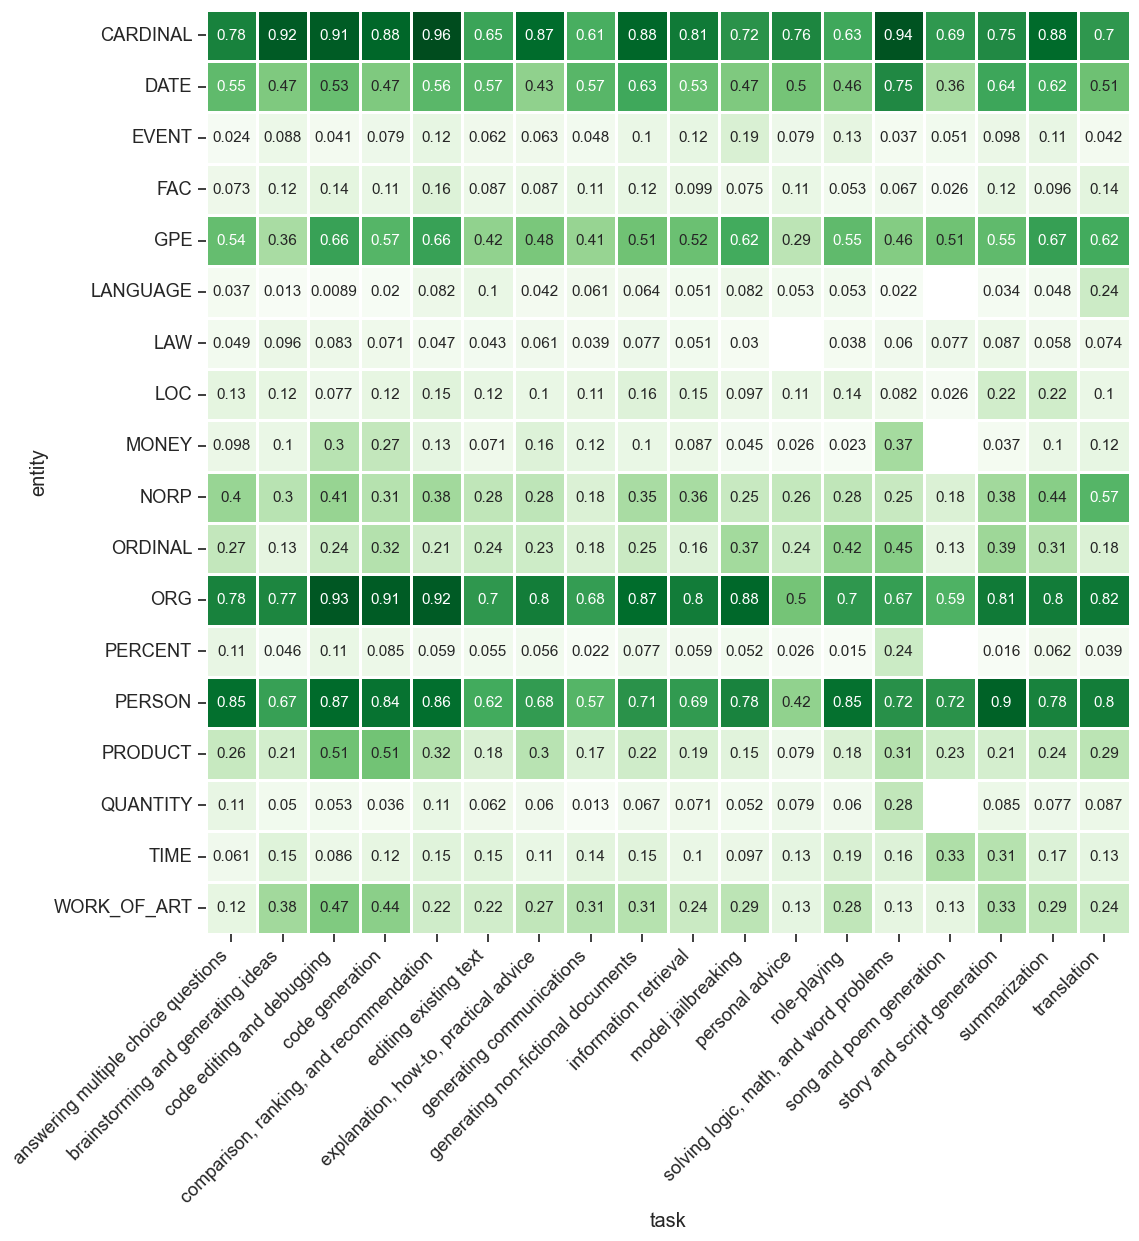

In [185]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_tasks_dict.items():
    _entities = conversation_entity_labels_dict[_conversation]
    _entities = list(set(_entities))
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
# plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_entities.pdf', bbox_inches='tight')
plt.show()

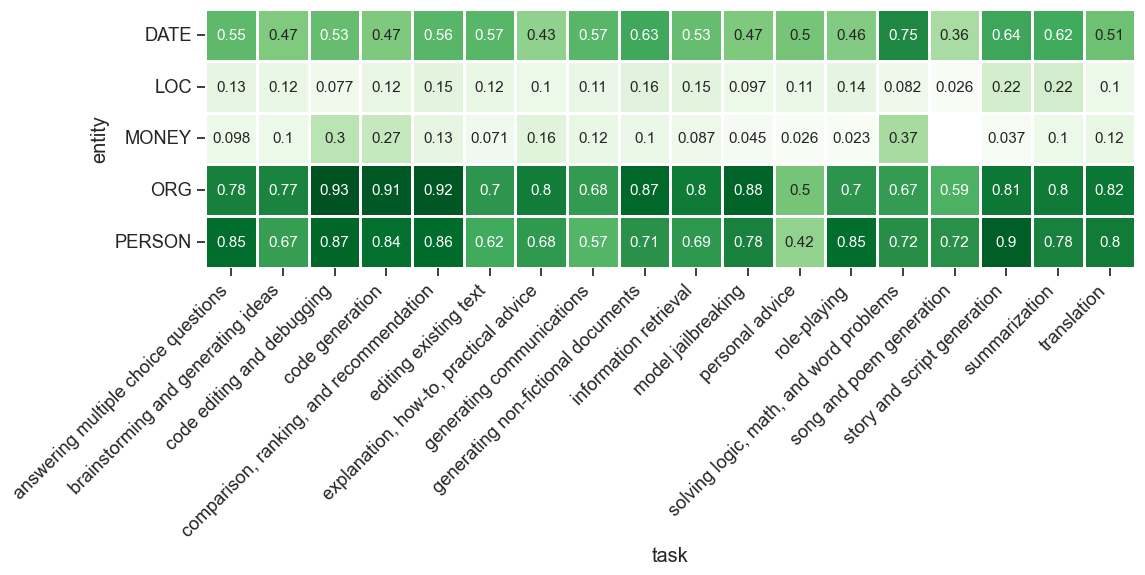

In [182]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_tasks_dict.items():
    _entities = conversation_entity_labels_dict[_conversation]
    _entities = list(set(_entities))
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            if _entity in ['DATE', 'MONEY', 'LOC', 'ORG', 'PERSON']:
                task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_entities.pdf', bbox_inches='tight')
plt.show()

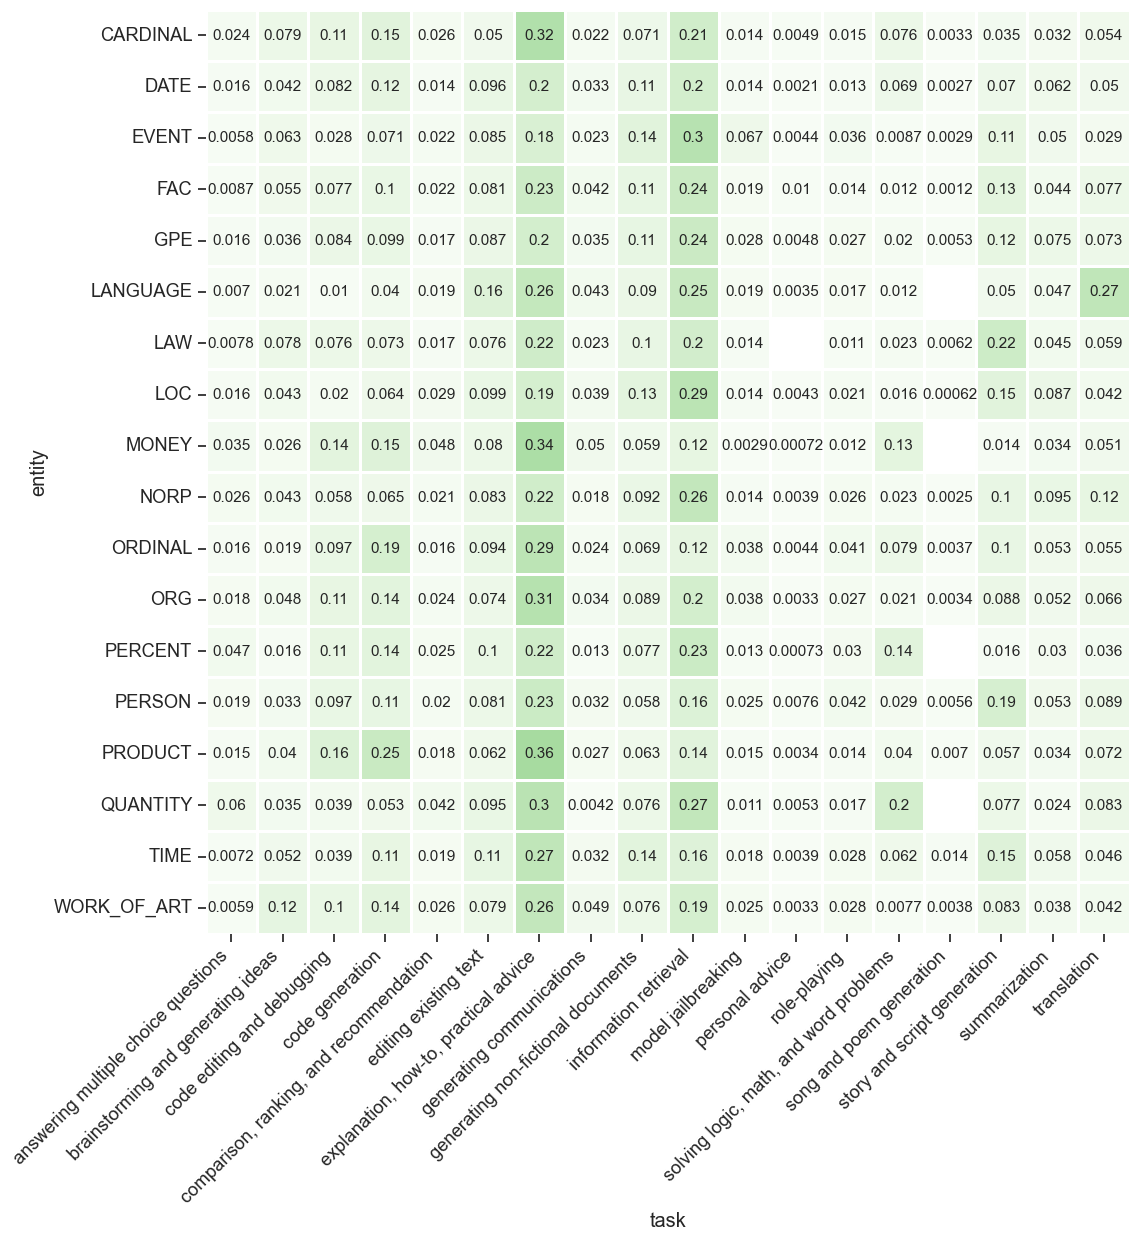

In [184]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
entity_count_dict = defaultdict(int)

for _conversation, _entities in conversation_entity_labels_dict.items():
    _tasks = conversation_tasks_dict[_conversation]
    for _entity in _entities:
        entity_count_dict[_entity] += 1
        for _task in _tasks:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(entity_count_dict[_entity])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'entity': _entity,
                              'proportion of conversations with entity': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of conversations with entity')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
# plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_entities.pdf', bbox_inches='tight')
plt.show()

### Heatmap sensitive x NER

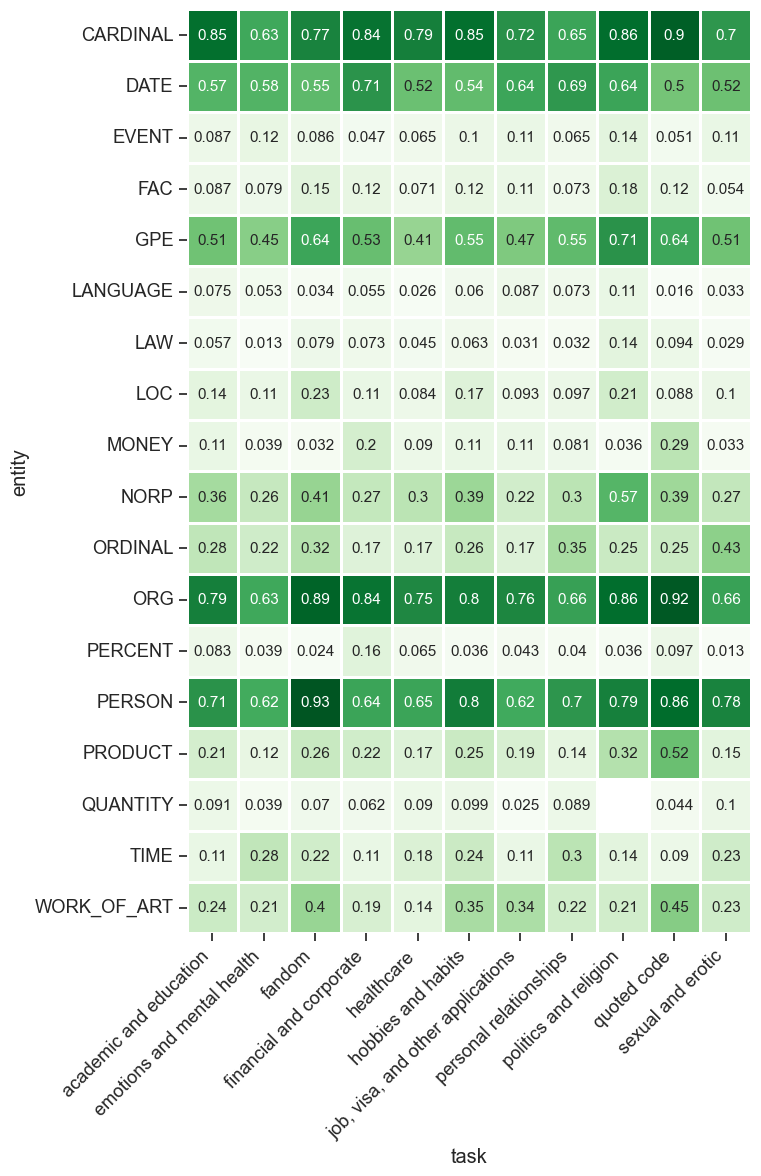

In [103]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_sensitives_dict.items():
    _entities = conversation_entity_labels_dict[_conversation]
    _entities = list(set(_entities))
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': sensitive_shortened_dict[_task],
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of task')
df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
# plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_entities.pdf', bbox_inches='tight')
plt.show()

### Heatmap tasks x PII

In [60]:
id_category_names = ['AUPassportNumber', 'EUDriversLicenseNumber', 'EUNationalIdentificationNumber', 'EUPassportNumber', 'IDIdentityCardNumber']

count = 0

for _conversation, _pii in conversation_pii_dict.items():
    _entities = list(set(_pii))
    for _entity in _entities:
        if _entity in id_category_names:
            count += 1

count

5

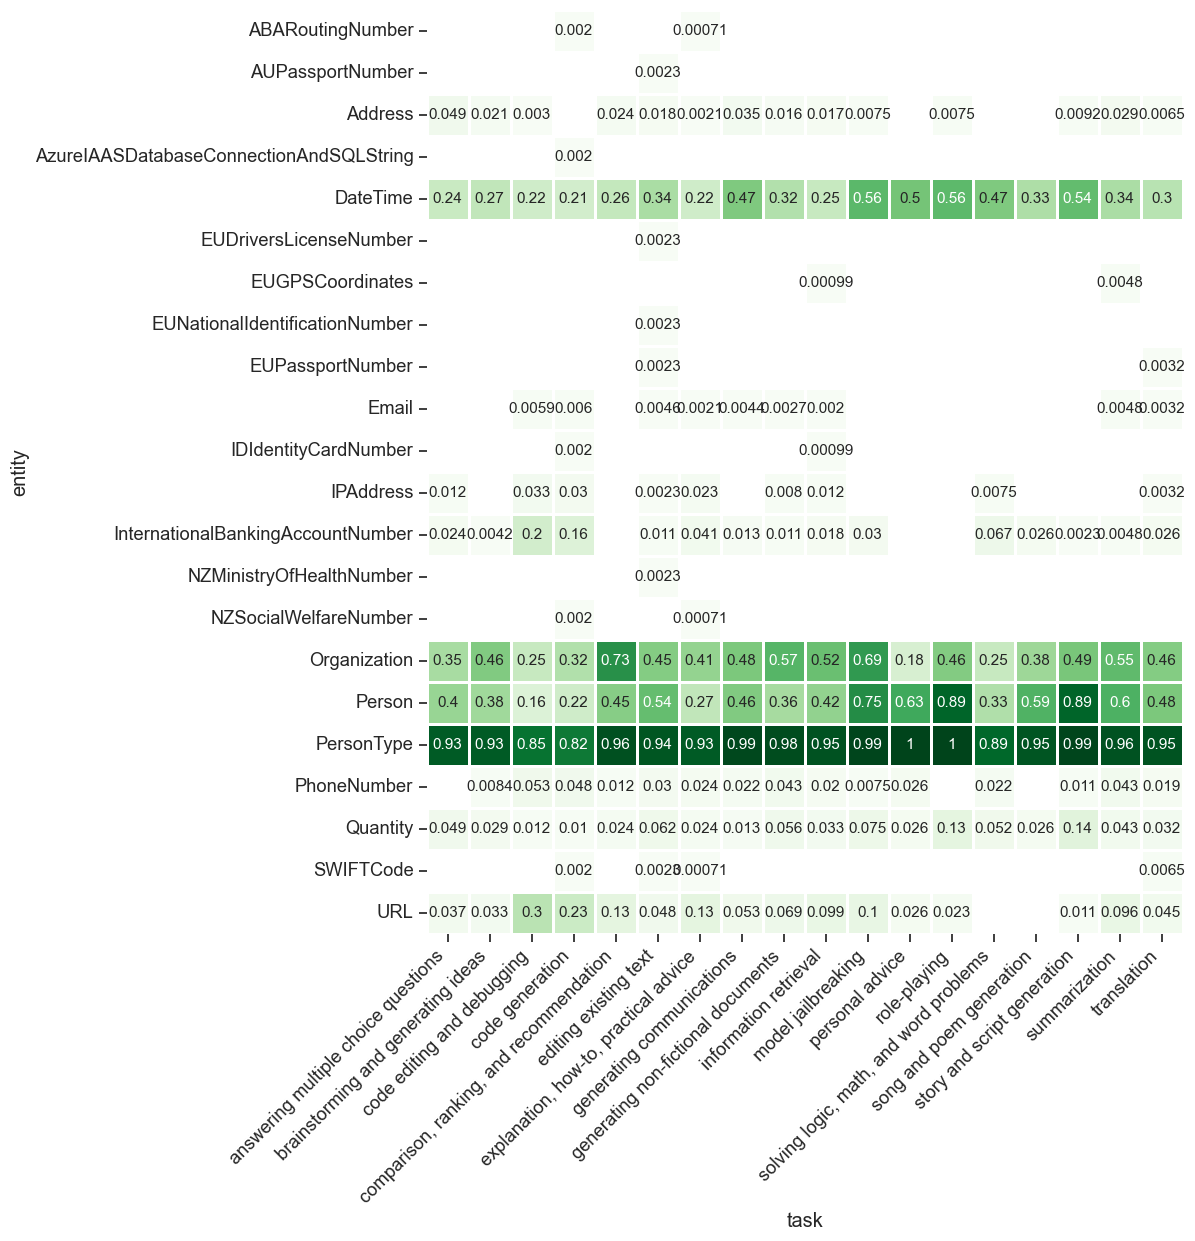

In [55]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_tasks_dict.items():
    _entities = conversation_pii_dict[_conversation]
    _entities = list(set(_entities))
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
# plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_entities.pdf', bbox_inches='tight')
plt.show()

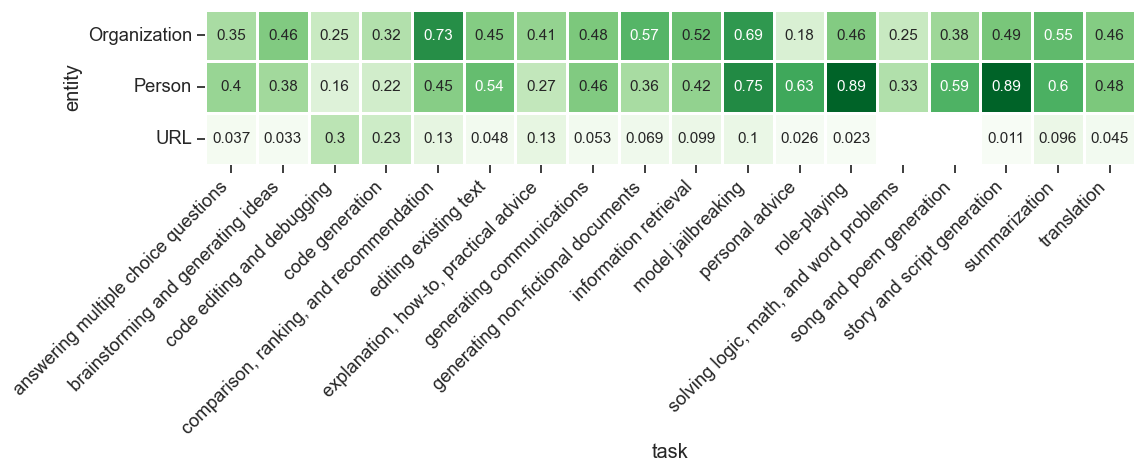

In [54]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_tasks_dict.items():
    _entities = conversation_pii_dict[_conversation]
    _entities = list(set(_entities))
    _entities = [e for e in _entities if e in ['Organization', 'Person', 'URL']]
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'task': _task,
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='task', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(12,12))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.tasks_x_pii.pdf', bbox_inches='tight')
plt.show()

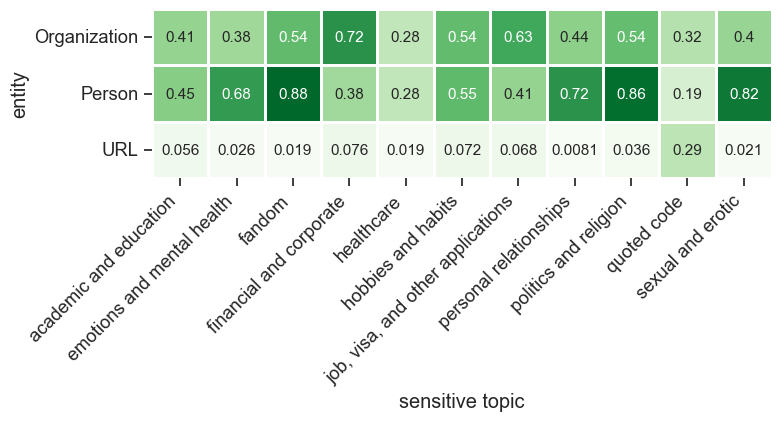

In [104]:
task_entity_count_dict = defaultdict(lambda: defaultdict(int))
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_sensitives_dict.items():
    _entities = conversation_pii_dict[_conversation]
    _entities = list(set(_entities))
    _entities = [e for e in _entities if e in ['Organization', 'Person', 'URL']]
    for _task in _tasks:
        task_count_dict[_task] += 1
        for _entity in _entities:
            task_entity_count_dict[_task][_entity] += 1

task_entity_proportion_dict = defaultdict(lambda: defaultdict(float))
for _task, _entity_count_dict in task_entity_count_dict.items():
    for _entity, _count in _entity_count_dict.items():
        task_entity_proportion_dict[_task][_entity] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _entity_proportion_dict in task_entity_proportion_dict.items():
    for _entity, _proportion in _entity_proportion_dict.items():
        dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                              'entity': _entity,
                              'proportion of task': _proportion})
df_to_plot = pd.DataFrame(dicts_to_plot)

df_wide = df_to_plot.pivot_table(index='entity', 
                                 columns='sensitive topic', 
                                 values='proportion of task')
# df_norm_col = (df_wide-df_wide.mean())/df_wide.std()
    
plt.figure(figsize=(8,4))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, 
            linewidths=1, 
            cmap='Greens',
            center=0.5,
            cbar=False,
            square=True,
            annot=True,
            # fmt='g',
            annot_kws={"fontsize":11}) 
plt.xticks(rotation=45, ha='right')
plt.savefig(output_directory_path + '/plots/heatmap.sensitives_x_pii.pdf', bbox_inches='tight')
plt.show()

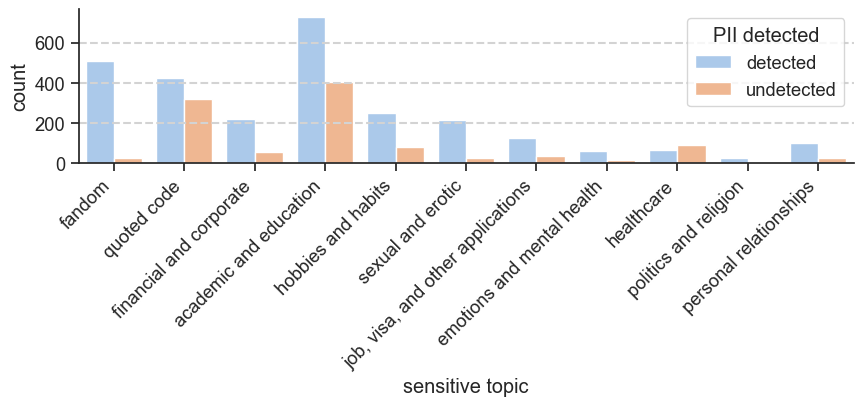

In [107]:
task_detected_count_dict = defaultdict(int)
task_undetected_count_dict = defaultdict(int)
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_sensitives_dict.items():
    _entities = conversation_pii_dict[_conversation]
    _entities = list(set(_entities))
    _entities = [e for e in _entities if e in ['Organization', 'Person', 'URL']]
    for _task in _tasks:
        task_count_dict[_task] += 1
        if len(_entities) > 0:
            task_detected_count_dict[_task] += 1
        else:
            task_undetected_count_dict[_task] += 1

# task_detected_proportion_dict = defaultdict(lambda: defaultdict(float))
# for _task, _count in task_detected_count_dict.items():
#     task_detected_proportion_dict[_task] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _count in task_detected_count_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'count': _count,
                          'PII detected': 'detected'})
for _task, _count in task_undetected_count_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'count': _count,
                          'PII detected': 'undetected'})
df_to_plot = pd.DataFrame(dicts_to_plot)

plt.figure(figsize=(10,2))
sns.set(style='ticks', font_scale=1.2)
ax = sns.barplot(df_to_plot, 
            x='sensitive topic', 
            y='count',
            hue='PII detected',
            palette='pastel') 
sns.despine()
# plt.grid()
plt.axhline(y=600, color='lightgray', linestyle='--')
plt.axhline(y=400, color='lightgray', linestyle='--')
plt.axhline(y=200, color='lightgray', linestyle='--')
plt.xticks(rotation=45, ha='right')
# plt.xlabel('')
# ax.get_legend().remove()
# ax.xaxis.set_ticklabels([])
plt.savefig(output_directory_path + '/plots/barplot.sensitive_x_pii_detected.counts.pdf', bbox_inches='tight')
plt.show()

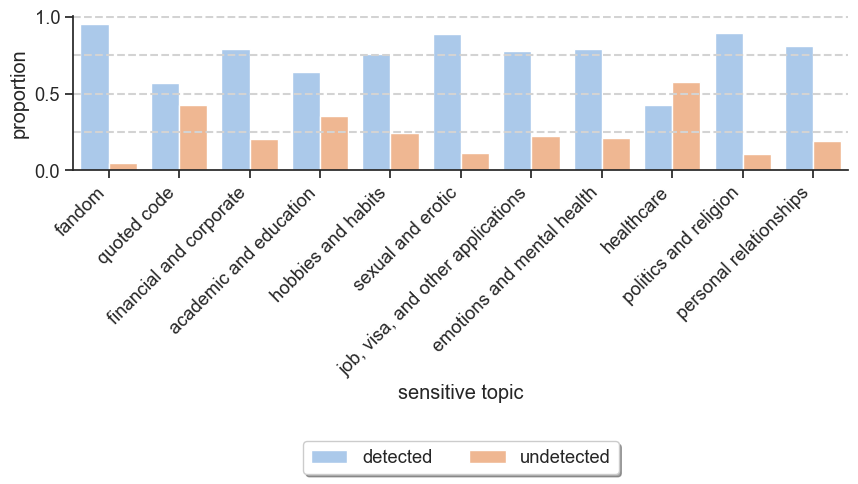

In [106]:
task_detected_count_dict = defaultdict(int)
task_undetected_count_dict = defaultdict(int)
task_count_dict = defaultdict(int)

for _conversation, _tasks in conversation_sensitives_dict.items():
    _entities = conversation_pii_dict[_conversation]
    _entities = list(set(_entities))
    _entities = [e for e in _entities if e in ['Organization', 'Person', 'URL']]
    for _task in _tasks:
        task_count_dict[_task] += 1
        if len(_entities) > 0:
            task_detected_count_dict[_task] += 1
        else:
            task_undetected_count_dict[_task] += 1

# task_detected_proportion_dict = defaultdict(lambda: defaultdict(float))
# for _task, _count in task_detected_count_dict.items():
#     task_detected_proportion_dict[_task] = _count / float(task_count_dict[_task])

dicts_to_plot = []
for _task, _count in task_detected_count_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'proportion': _count / float(task_count_dict[_task]),
                          'PII detected': 'detected'})
for _task, _count in task_undetected_count_dict.items():
    dicts_to_plot.append({'sensitive topic': sensitive_shortened_dict[_task],
                          'proportion': _count / float(task_count_dict[_task]),
                          'PII detected': 'undetected'})
df_to_plot = pd.DataFrame(dicts_to_plot)

plt.figure(figsize=(10,2))
sns.set(style='ticks', font_scale=1.2)
ax = sns.barplot(df_to_plot, 
                 x='sensitive topic', 
                 y='proportion',
                 hue='PII detected',
                 palette='pastel') 
sns.despine()
# plt.grid()
plt.axhline(y=1, color='lightgray', linestyle='--')
plt.axhline(y=0.75, color='lightgray', linestyle='--')
plt.axhline(y=0.5, color='lightgray', linestyle='--')
plt.axhline(y=0.25, color='lightgray', linestyle='--')
plt.xticks(rotation=45, ha='right')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -1.7),
          fancybox=True, shadow=True, ncol=5)
plt.savefig(output_directory_path + '/plots/barplot.sensitive_x_pii_detected.proportions.pdf', bbox_inches='tight')
plt.show()